In [1]:
import pandas as pd
pakistan_df= pd.read_csv("pakistan_data.csv")

In [2]:
pakistan_df

,source_name,source_link,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,...,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude,Date,Time,year,month
0,Dawn,https://www.dawn.com/news/551761,5km,landslide,downpour,medium,unknown,0.0,NaN,NaN,...,Gilgit-Baltistan,2005.0,Barishāl,41.15433,74.860900,36.656700,2010-08-06,00:00:00,2010,8
1,Tribune India.com,NaN,25km,landslide,rain,medium,unknown,2.0,NaN,NaN,...,Kashmir,14711.0,Kupwāra,18.10887,74.333300,33.877800,2007-03-19,00:00:00,2007,3
2,Hindustan Times,http://www.hindustantimes.com/chandigarh/lands...,1km,landslide,downpour,medium,unknown,NaN,NaN,NaN,...,Himachal Pradesh,2467.0,Jutogh,8.68139,77.102900,31.022600,2012-09-18,00:00:00,2012,9
3,Tribune India,http://www.tribuneindia.com/news/himachal/four...,5km,landslide,unknown,large,above_road,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,77.109719,31.956546,2016-09-02,18:04:00,2016,9
4,Tribal News Network,http://www.radiotnn.com/mudslide-kills-two-kid...,25km,landslide,rain,small,NaN,3.0,0.0,NaN,...,NaN,NaN,NaN,NaN,71.398496,34.525881,2016-09-08,18:04:00,2016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,NDTV,http://www.ndtv.com/india-news/jawan-dies-afte...,5km,landslide,NaN,medium,natural_slope,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,75.545640,33.144018,2017-07-12,14:00:00,2017,7
592,The Express Tribune,https://tribune.com.pk/story/1375746/five-kill...,1km,rock_fall,unknown,medium,urban,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,66.971973,24.932951,2017-04-06,13:19:00,2017,4
593,Chandigarh Metro,https://chandigarhmetro.com/manali-rohtang-hig...,1km,landslide,snowfall_snowmelt,small,above_road,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,77.233987,32.361492,2017-04-23,17:58:00,2017,4
594,The Indian Express,http://indianexpress.com/article/trending/vira...,10km,landslide,rain,medium,below_road,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,73.754213,34.175047,2017-06-23,13:16:00,2017,6


In [5]:
data = pakistan_df

In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [6]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

linear_regression_features = ['longitude', 'latitude', 'year', 'month']
logistic_regression_features = ['landslide_trigger', 'landslide_size', 'landslide_setting', 'storm_name', 'admin_division_population']
svm_features = ['longitude', 'latitude', 'landslide_size', 'admin_division_population']
decision_tree_random_forest_features = ['longitude', 'latitude', 'landslide_size', 'admin_division_name', 'admin_division_population', 'year']
kmeans_dbscan_features = ['longitude', 'latitude']
X = data.drop('landslide_category', axis=1)
y = data['landslide_category']
X_lr = X[linear_regression_features]
X_logistic = X[logistic_regression_features]
X_svm = X[svm_features]
X_dt_rf = X[decision_tree_random_forest_features]
X_cluster = X[kmeans_dbscan_features]
print('Linear Regression features:', linear_regression_features)
print('Logistic Regression features:', logistic_regression_features)
print('SVM features:', svm_features)
print('Decision Tree and Random Forest features:', decision_tree_random_forest_features)
print('K-means and DBSCAN features:', kmeans_dbscan_features)

Linear Regression features: ['longitude', 'latitude', 'year', 'month']
Logistic Regression features: ['landslide_trigger', 'landslide_size', 'landslide_setting', 'storm_name', 'admin_division_population']
SVM features: ['longitude', 'latitude', 'landslide_size', 'admin_division_population']
Decision Tree and Random Forest features: ['longitude', 'latitude', 'landslide_size', 'admin_division_name', 'admin_division_population', 'year']
K-means and DBSCAN features: ['longitude', 'latitude']


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original data
data_encoded = data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column and label encode the features
for column in data.columns:
    # Check if the column contains categorical data
    if data[column].dtype == 'object':
        # Label encode the column
        data_encoded[column] = label_encoder.fit_transform(data[column].astype(str))

# Replace NaN values with the most frequent label in each column
data_encoded = data_encoded.fillna(data_encoded.mode().iloc[0])

# Use the encoded data for further analysis
X_encoded = data_encoded.drop('landslide_category', axis=1)
y_encoded = data_encoded['landslide_category']

# Split the encoded data into respective models
X_lr_encoded = X_encoded[linear_regression_features]
X_logistic_encoded = X_encoded[logistic_regression_features]
X_svm_encoded = X_encoded[svm_features]
X_dt_rf_encoded = X_encoded[decision_tree_random_forest_features]
X_cluster_encoded = X_encoded[kmeans_dbscan_features]

# Print the encoded features
print('Linear Regression features:', X_lr_encoded.columns.tolist())
print('Logistic Regression features:', X_logistic_encoded.columns.tolist())
print('SVM features:', X_svm_encoded.columns.tolist())
print('Decision Tree and Random Forest features:', X_dt_rf_encoded.columns.tolist())
print('K-means and DBSCAN features:', X_cluster_encoded.columns.tolist())

Linear Regression features: ['longitude', 'latitude', 'year', 'month']
Logistic Regression features: ['landslide_trigger', 'landslide_size', 'landslide_setting', 'storm_name', 'admin_division_population']
SVM features: ['longitude', 'latitude', 'landslide_size', 'admin_division_population']
Decision Tree and Random Forest features: ['longitude', 'latitude', 'landslide_size', 'admin_division_name', 'admin_division_population', 'year']
K-means and DBSCAN features: ['longitude', 'latitude']


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN

# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_lr_encoded, y_encoded)

# SVM
svm_model = SVC()
svm_model.fit(X_svm_encoded, y_encoded)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_dt_rf_encoded, y_encoded)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_dt_rf_encoded, y_encoded)

# K-means
kmeans_model = KMeans()
kmeans_model.fit(X_cluster_encoded)

# DBSCAN
dbscan_model = DBSCAN()
dbscan_model.fit(X_cluster_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBSCAN()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_logistic_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = logistic_regression_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8166666666666667


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SVM evaluation
y_svm_pred = svm_model.predict(X_svm_encoded)
svm_accuracy = accuracy_score(y_encoded, y_svm_pred)

# Decision Tree evaluation
y_dt_pred = decision_tree_model.predict(X_dt_rf_encoded)
dt_accuracy = accuracy_score(y_encoded, y_dt_pred)

# Random Forest evaluation
y_rf_pred = random_forest_model.predict(X_dt_rf_encoded)
rf_accuracy = accuracy_score(y_encoded, y_rf_pred)



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SVM evaluation
y_svm_pred = svm_model.predict(X_svm_encoded)
svm_accuracy = accuracy_score(y_encoded, y_svm_pred)
svm_precision = precision_score(y_encoded, y_svm_pred, average='weighted')
svm_recall = recall_score(y_encoded, y_svm_pred, average='weighted')
svm_f1 = f1_score(y_encoded, y_svm_pred, average='weighted')

print("SVM Evaluation:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)



SVM Evaluation:
Accuracy: 0.87248322147651
Precision: 0.7612269717580289
Recall: 0.87248322147651
F1-score: 0.8130668013759592


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Make predictions
is_landslide_pred = svm_model.predict(X_svm_encoded)
decision_scores = svm_model.decision_function(X_svm_encoded)

# Define category labels
category_labels = ['landslide', 'rock_fall', 'mudslide']

# Print predictions and probabilities
for i in range(len(is_landslide_pred)):
    if is_landslide_pred[i] == 1:
        landslide_category = category_labels[int(decision_scores[i].argmax())]
        landslide_confidence = decision_scores[i].max()
        print("Landslide detected. Category:", landslide_category)
        print("Confidence Score:", round(landslide_confidence, 2))
    else:
        print("No landslide detected.")

No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslide detected.
No landslid

In [15]:
import pandas as pd
features = {
    'bagging': ['longitude', 'latitude', 'year', 'month'],
    'gradient_boosting': ['landslide_trigger', 'landslide_size', 'landslide_setting', 'storm_name', 'admin_division_population'],
    'ada_boost': ['longitude', 'latitude', 'landslide_size', 'admin_division_population'],
    'fp_growth': ['longitude', 'latitude']
}

# Print the selected features for each algorithm
for algorithm, feature_list in features.items():
    print(f'{algorithm.capitalize()} features:', feature_list)


Bagging features: ['longitude', 'latitude', 'year', 'month']
Gradient_boosting features: ['landslide_trigger', 'landslide_size', 'landslide_setting', 'storm_name', 'admin_division_population']
Ada_boost features: ['longitude', 'latitude', 'landslide_size', 'admin_division_population']
Fp_growth features: ['longitude', 'latitude']


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

selected_features = X_dt_rf

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

numeric_features = selected_features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = selected_features.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define and train the bagging classifier with decision trees
bagging_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42))
])

bagging_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy_bagging = bagging_classifier.score(X_test, y_test)
print("Bagging Classifier Accuracy:", accuracy_bagging)


Bagging Classifier Accuracy: 0.825


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


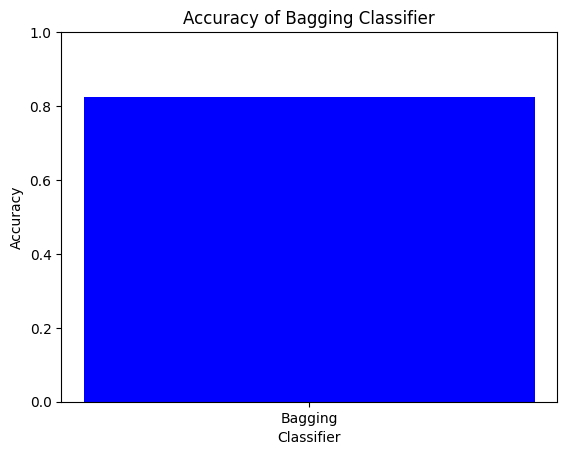

In [32]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.bar('Bagging', accuracy_bagging, color='blue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Bagging Classifier')
plt.ylim(0, 1)
plt.show()


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import fpgrowth

selected_features = X_dt_rf


X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

numeric_features = selected_features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = selected_features.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define and train the Gradient Boosting classifier
gradient_boosting_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gradient_boosting_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy_gradient_boosting = gradient_boosting_classifier.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_gradient_boosting)

Gradient Boosting Classifier Accuracy: 0.8083333333333333


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


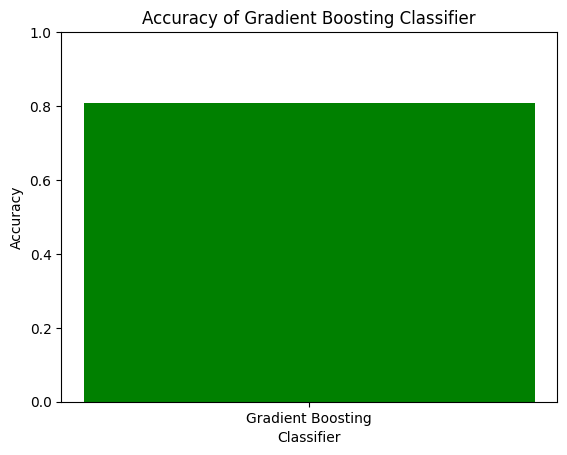

In [33]:
# Plot accuracy
plt.bar('Gradient Boosting', accuracy_gradient_boosting, color='green')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Gradient Boosting Classifier')
plt.ylim(0, 1)
plt.show()


In [21]:
# Define and train the AdaBoost classifier
adaboost_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42))
])

adaboost_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy_adaboost = adaboost_classifier.score(X_test, y_test)
print("AdaBoost Classifier Accuracy:", accuracy_adaboost)

AdaBoost Classifier Accuracy: 0.8166666666666667


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


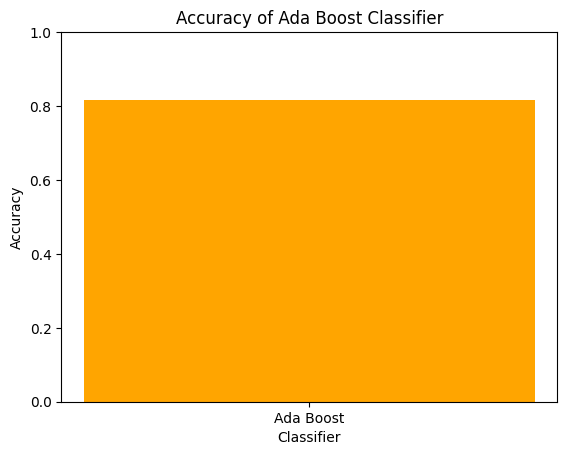

In [35]:
# Plot accuracy
plt.bar('Ada Boost', accuracy_adaboost, color='orange')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ada Boost Classifier')
plt.ylim(0, 1)
plt.show()


In [29]:
print("Shape of numeric features:", numeric_features.shape)
print("Shape of categorical features:", preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).shape)


Shape of numeric features: (4,)
Shape of categorical features: (29,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

preprocessed_data = preprocessor.fit_transform(selected_features)

preprocessed_data_dense = preprocessed_data.toarray()

preprocessed_df = pd.DataFrame(preprocessed_data_dense)

binarizer = Binarizer()
binarized_data = pd.DataFrame(binarizer.fit_transform(preprocessed_df), columns=preprocessed_df.columns)

# Use FP-growth to find frequent itemsets
frequent_itemsets = fpgrowth(binarized_data, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules)


    antecedents   consequents  antecedent support  consequent support  \
0           (1)           (3)            1.000000            1.000000   
1           (3)           (1)            1.000000            1.000000   
2           (0)           (1)            1.000000            1.000000   
3           (1)           (0)            1.000000            1.000000   
4           (0)           (3)            1.000000            1.000000   
..          ...           ...                 ...                 ...   
708      (0, 6)     (1, 2, 3)            0.139262            0.870805   
709      (1, 6)     (0, 2, 3)            0.139262            0.870805   
710      (2, 6)     (0, 1, 3)            0.129195            1.000000   
711      (3, 6)     (0, 1, 2)            0.139262            0.870805   
712         (6)  (0, 1, 2, 3)            0.139262            0.870805   

      support  confidence      lift  leverage  conviction  zhangs_metric  
0    1.000000    1.000000  1.000000  0.000000   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


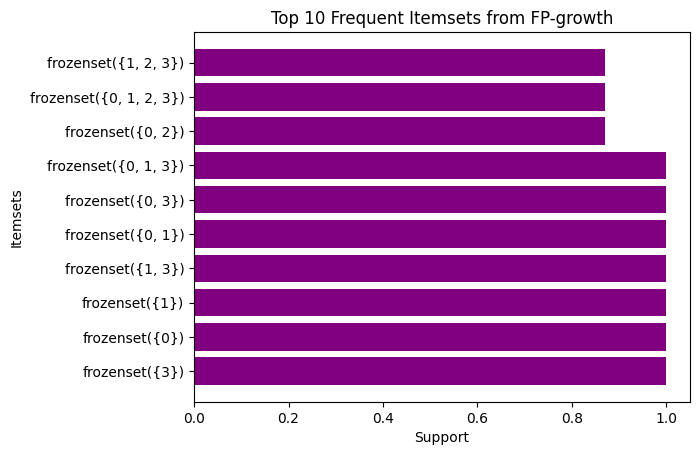

In [37]:
top_n = 10
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False).head(top_n)

# Plot frequent itemsets
plt.barh(range(len(frequent_itemsets_sorted)), frequent_itemsets_sorted['support'], color='purple')
plt.yticks(range(len(frequent_itemsets_sorted)), frequent_itemsets_sorted['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top {} Frequent Itemsets from FP-growth'.format(top_n))
plt.show()

